In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define the MLP class
class CustomMLP:
    def __init__(self, input_dim, output_dim, hidden_layers=(128,), activations=('relu',), epochs=20, batch_size=32,
                 learning_rate=0.001, momentum=0.9):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layers = hidden_layers
        self.activations = activations
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=(self.input_dim,)))
        
        for i in range(len(self.hidden_layers)):
            model.add(tf.keras.layers.Dense(self.hidden_layers[i], activation=self.activations[i]))
        
        model.add(tf.keras.layers.Dense(self.output_dim, activation='softmax'))
        
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=self.learning_rate, momentum=self.momentum),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        return model

    def fit(self, X_train, y_train, validation_data=None):
        history = self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size, 
                                 validation_data=validation_data, verbose=2)
        return history

    def test(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)

        precision = precision_score(y_test, y_pred_classes, average='macro')
        recall = recall_score(y_test, y_pred_classes, average='macro')
        f1 = f1_score(y_test, y_pred_classes, average='macro')
        accuracy = accuracy_score(y_test, y_pred_classes)
        confusion = confusion_matrix(y_test, y_pred_classes)

        return {
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'accuracy': accuracy,
            'confusion_matrix': confusion
        }

    def tune(self, X_train, y_train, param_grid, cv=3):
        grid_search = GridSearchCV(self.model, param_grid, cv=cv, n_jobs=-1, scoring='accuracy', verbose=2)
        grid_search.fit(X_train, y_train)
        return grid_search.best_params_

In [3]:
# Load and preprocess the data (same code as provided in your example)
# ...

In [4]:
import os
import re

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    # Use regular expression to extract the numeric part from the file name
    match = re.search(r'subject(\d+)', file_name)
    if match:
        return int(match.group(1)) - 1  # Subtract 1 to make labels start from 0
    else:
        raise ValueError(f"Unable to extract label from file name: {file_name}")


# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'D:/img/yale'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    # print(img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [5]:
# Create and train the MLP model
mlp = CustomMLP(input_dim=X_train.shape[1], output_dim=15, hidden_layers=(128, 64), activations=('relu', 'relu'),
                epochs=20, batch_size=32, learning_rate=0.001, momentum=0.9)

history = mlp.fit(X_train, y_train, validation_data=(X_test, y_test))

# Test the MLP model
results = mlp.test(X_test, y_test)
print("Results without hyperparameter tuning:")
print(f'Precision: {results["precision"]:.2f}')
print(f'Recall: {results["recall"]:.2f}')
print(f'F1-score: {results["f1_score"]:.2f}')
print(f'Accuracy: {results["accuracy"]:.2f}')
print("Confusion Matrix:")
print(results["confusion_matrix"])

Epoch 1/20
5/5 - 2s - loss: 2870075904.0000 - accuracy: 0.0735 - val_loss: 71761.7188 - val_accuracy: 0.0588 - 2s/epoch - 304ms/step
Epoch 2/20
5/5 - 0s - loss: 114527.5859 - accuracy: 0.0662 - val_loss: 69909.5625 - val_accuracy: 0.0588 - 463ms/epoch - 93ms/step
Epoch 3/20
5/5 - 0s - loss: 2.7080 - accuracy: 0.0956 - val_loss: 91507.2812 - val_accuracy: 0.0588 - 467ms/epoch - 93ms/step
Epoch 4/20
5/5 - 0s - loss: 2.7078 - accuracy: 0.0956 - val_loss: 104210.9297 - val_accuracy: 0.0588 - 480ms/epoch - 96ms/step
Epoch 5/20
5/5 - 0s - loss: 2.7077 - accuracy: 0.0956 - val_loss: 111637.1875 - val_accuracy: 0.0588 - 456ms/epoch - 91ms/step
Epoch 6/20
5/5 - 0s - loss: 2.7077 - accuracy: 0.0956 - val_loss: 116021.0547 - val_accuracy: 0.0588 - 461ms/epoch - 92ms/step
Epoch 7/20
5/5 - 0s - loss: 2.7076 - accuracy: 0.0956 - val_loss: 118605.9766 - val_accuracy: 0.0588 - 454ms/epoch - 91ms/step
Epoch 8/20
5/5 - 0s - loss: 2.7075 - accuracy: 0.0956 - val_loss: 120132.3281 - val_accuracy: 0.0588 -

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

# Define the MLP class
class CustomMLP(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, output_dim, hidden_layers=(128,), activations=('relu',), epochs=20, batch_size=32,
                 learning_rate=0.001, momentum=0.9):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layers = hidden_layers
        self.activations = activations
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=(self.input_dim,)))
        
        for i in range(len(self.hidden_layers)):
            model.add(tf.keras.layers.Dense(self.hidden_layers[i], activation=self.activations[i]))
        
        model.add(tf.keras.layers.Dense(self.output_dim, activation='softmax'))
        
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=self.learning_rate, momentum=self.momentum),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        return model

    def fit(self, X_train, y_train, validation_data=None):
        history = self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size, 
                                 validation_data=validation_data, verbose=2)
        return history

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [7]:
import os
import re

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    # Use regular expression to extract the numeric part from the file name
    match = re.search(r'subject(\d+)', file_name)
    if match:
        return int(match.group(1)) - 1  # Subtract 1 to make labels start from 0
    else:
        raise ValueError(f"Unable to extract label from file name: {file_name}")


# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'D:/img/yale'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    # print(img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

In [9]:
# Define the MLP class
class CustomMLP(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, output_dim, hidden_layers=(128,), activations=('relu',), epochs=20, batch_size=32,
                 learning_rate=0.001, momentum=0.9):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layers = hidden_layers
        self.activations = activations
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Input(shape=(self.input_dim,)))
        
        for i in range(len(self.hidden_layers)):
            model.add(tf.keras.layers.Dense(self.hidden_layers[i], activation=self.activations[i]))
        
        model.add(tf.keras.layers.Dense(self.output_dim, activation='softmax'))
        
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=self.learning_rate, momentum=self.momentum),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        return model

    def fit(self, X_train, y_train, validation_data=None):
        history = self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size, 
                                 validation_data=validation_data, verbose=2)
        return history

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [10]:
# Load and preprocess the data (same code as provided in your example)
# ...
import os
import re

# Load and preprocess the data
data = []  # List to store image data
labels = []  # List to store labels

# Define a function to extract the person label from the file name
def extract_person_label(file_name):
    # Use regular expression to extract the numeric part from the file name
    match = re.search(r'subject(\d+)', file_name)
    if match:
        return int(match.group(1)) - 1  # Subtract 1 to make labels start from 0
    else:
        raise ValueError(f"Unable to extract label from file name: {file_name}")


# Load data and labels
# Assuming the dataset files are in the 'dataset' directory
dataset_dir = 'D:/img/yale'

for file_name in os.listdir(dataset_dir):
    img = plt.imread(os.path.join(dataset_dir, file_name))
    # print(img.shape)
    data.append(img.flatten())  # Flatten image into a 1D array
    labels.append(extract_person_label(file_name))

data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [12]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layers': [(128,), (128, 64), (64, 64)],
    'activations': [('relu',), ('relu', 'relu'), ('sigmoid', 'relu')],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64],
    'learning_rate': [0.001, 0.01],
    'momentum': [0.9, 0.95]
}

# Create and train the MLP model with hyperparameter tuning
mlp = CustomMLP(input_dim=X_train.shape[1], output_dim=15)

grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

#Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/30
5/5 - 1s - loss: 2.9972 - accuracy: 0.0662 - 1s/epoch - 244ms/step
Epoch 2/30
5/5 - 0s - loss: 2.8662 - accuracy: 0.0662 - 219ms/epoch - 44ms/step
Epoch 3/30
5/5 - 0s - loss: 2.8206 - accuracy: 0.0735 - 219ms/epoch - 44ms/step
Epoch 4/30
5/5 - 0s - loss: 2.7899 - accuracy: 0.0735 - 219ms/epoch - 44ms/step
Epoch 5/30
5/5 - 0s - loss: 2.7688 - accuracy: 0.0735 - 203ms/epoch - 41ms/step
Epoch 6/30
5/5 - 0s - loss: 2.7483 - accuracy: 0.0662 - 203ms/epoch - 41ms/step
Epoch 7/30
5/5 - 0s - loss: 2.7343 - accuracy: 0.0809 - 203ms/epoch - 41ms/step
Epoch 8/30
5/5 - 0s - loss: 2.7253 - accuracy: 0.0882 - 219ms/epoch - 44ms/step
Epoch 9/30
5/5 - 0s - loss: 2.7193 - accuracy: 0.0735 - 219ms/epoch - 44ms/step
Epoch 10/30
5/5 - 0s - loss: 2.7075 - accuracy: 0.0662 - 219ms/epoch - 44ms/step
Epoch 11/30
5/5 - 0s - loss: 2.7066 - accuracy: 0.0882 - 219ms/epoch - 44ms/step
Epoch 12/30
5/5 - 0s - loss: 2.7073 - accuracy: 0.0882 - 219ms/epoch - 44ms/step
Epoch 13/30
5/5 - 0s - loss: 2.7072 - a

In [ ]:
# Define a parameter grid for randomized search with reduced options
param_dist = {
    'hidden_layers': [(128,), (64,), (128, 64)],
    'activations': [('relu',), ('sigmoid', 'relu')],
    'epochs': [10, 20],
    'batch_size': [32, 64],
    'learning_rate': [0.001, 0.01],
    'momentum': [0.9, 0.95]
}

# Create and train the MLP model with randomized search
mlp = CustomMLP(input_dim=X_train.shape[1], output_dim=15)

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
# Define a parameter grid for randomized search
param_dist = {
    'hidden_layers': [(128,), (128, 64), (64, 64)],
    'activations': [('relu',), ('relu', 'relu'), ('sigmoid', 'relu')],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64],
    'learning_rate': [0.001, 0.01],
    'momentum': [0.9, 0.95]
}

# Create and train the MLP model with randomized search
mlp = CustomMLP(input_dim=X_train.shape[1], output_dim=15)

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_
print("Best Hyperparameters:")
print(best_params)

In [13]:

# Create a new MLP model with the best hyperparameters
best_mlp = CustomMLP(input_dim=X_train.shape[1], output_dim=15, **best_params)

# Train the model with the best hyperparameters
best_mlp_history = best_mlp.fit(X_train, y_train, validation_data=(X_test, y_test))

# Test the MLP model with the best hyperparameters
y_pred = best_mlp.predict(X_test)


Epoch 1/30
5/5 - 1s - loss: 2.8578 - accuracy: 0.0588 - val_loss: 2.7781 - val_accuracy: 0.1471 - 1s/epoch - 283ms/step
Epoch 2/30
5/5 - 0s - loss: 2.8180 - accuracy: 0.0441 - val_loss: 2.7676 - val_accuracy: 0.1471 - 268ms/epoch - 54ms/step
Epoch 3/30
5/5 - 0s - loss: 2.8078 - accuracy: 0.0441 - val_loss: 2.7448 - val_accuracy: 0.1471 - 259ms/epoch - 52ms/step
Epoch 4/30
5/5 - 0s - loss: 2.7933 - accuracy: 0.0441 - val_loss: 2.7382 - val_accuracy: 0.1471 - 277ms/epoch - 55ms/step
Epoch 5/30
5/5 - 0s - loss: 2.7740 - accuracy: 0.0441 - val_loss: 2.7347 - val_accuracy: 0.1471 - 275ms/epoch - 55ms/step
Epoch 6/30
5/5 - 0s - loss: 2.7591 - accuracy: 0.0441 - val_loss: 2.7360 - val_accuracy: 0.1471 - 261ms/epoch - 52ms/step
Epoch 7/30
5/5 - 0s - loss: 2.7494 - accuracy: 0.0441 - val_loss: 2.7381 - val_accuracy: 0.1471 - 263ms/epoch - 53ms/step
Epoch 8/30
5/5 - 0s - loss: 2.7397 - accuracy: 0.0588 - val_loss: 2.7414 - val_accuracy: 0.0294 - 267ms/epoch - 53ms/step
Epoch 9/30
5/5 - 0s - loss

In [14]:
# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Results with Hyperparameter Tuning:")
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print("Confusion Matrix:")
print(confusion)

Results with Hyperparameter Tuning:
Precision: 0.00
Recall: 0.07
F1-score: 0.01
Accuracy: 0.06
Confusion Matrix:
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


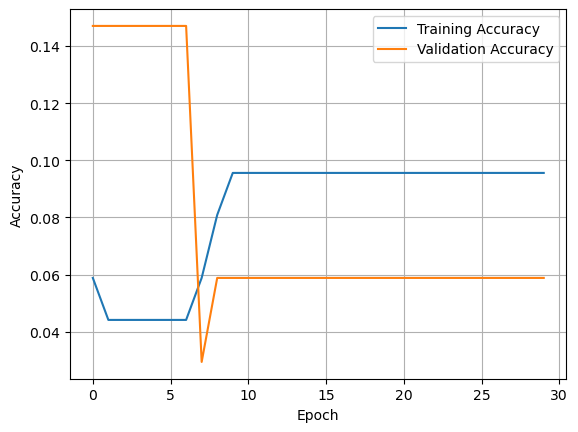

In [15]:
# Plot training and validation accuracies for each epoch
plt.plot(best_mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()